# Final Project Part 3 - Cheri Hung


In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

plt.style.use('ggplot')


## Part 1. Initial Exploration of Key Datasets

### Dataset 1: tb_IdealVActualC_2016_2017_winter.csv

#### Date range: 2016-12-01 to 2017-02-28
This is the main data table with *VarianceQty*. It is to be combined with dataset2.

| Variable | Description | Type of Variable |
|----------|:-------------:|------:|
| ProductID |Identifying ingredient ID | discrete numerical ID |
| BeginQty | Ingredient qty at the beginning of inventory period | continous numerical |
| EndQty | Ingredient qty at the end of inventory period | continous numerical |
| ActualQty | Difference between BeginQty and EndQty | continous numerical |
| IdealQty | What's the expected difference between BeginQty and EndQty | continous numerical |
| VarianceQty | Difference between ActualQty and IdealQty | continous numerical |


In [17]:
df_IvAC_raw = pd.read_csv("../assets/tb_IdealVActualC_2016_2017_winter.csv")
df_IvAC = df_IvAC_raw.dropna() 
df_IvAC.tail()

,InventoryID,ProductID,BeginQty,RecQty,EndQty,ActualQty,IdealQty,VarianceQty,PricePerQty,RecMeasureID
3356,948,459,4112.000,0.0,2384.000,1728.000,1060.00,668.000,0.13,8
3357,948,467,1467.168,0.0,779.472,687.696,718.09,-30.394,0.13,8
3358,948,481,4416.000,0.0,1856.000,2560.000,2007.20,552.800,0.03,7
3359,948,496,136.000,0.0,78.000,58.000,58.00,0.000,1.03,4
3360,948,913,81.152,0.0,43.112,38.040,0.00,38.040,0.11,7


In [21]:
df_IvAC.describe()

,InventoryID,ProductID,BeginQty,RecQty,EndQty,ActualQty,IdealQty,VarianceQty,PricePerQty,RecMeasureID
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000
mean,663.499842,424.165456,1743.284395,691.732011,1720.730012,714.286395,573.976940,140.309454,0.498712,6.799179
std,166.411294,161.470676,3018.103860,3177.854524,2948.903071,2965.367825,2273.630023,1687.956535,0.739815,1.563388
min,388.000000,26.000000,0.000000,-2880.000000,0.000000,-21977.600000,0.000000,-22267.320000,0.010000,4.000000
25%,517.000000,339.000000,132.765000,0.000000,135.128000,3.381000,10.000000,-29.722000,0.080000,7.000000
50%,653.000000,458.000000,793.600000,0.000000,793.600000,133.616000,126.000000,7.130000,0.140000,7.000000
75%,809.000000,495.000000,2140.608000,74.328000,2112.000000,640.000000,453.075000,192.000000,0.610000,8.000000
max,948.000000,953.000000,40320.000000,93888.000000,40320.000000,80352.000000,77259.710000,26864.530000,8.340000,9.000000


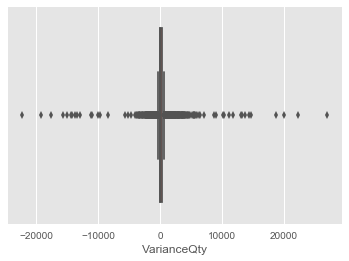

In [35]:
varQty = df_IvAC.VarianceQty
varQty_pos = df_IvAC[varQty > 0].VarianceQty
varQty_neg = df_IvAC[varQty < 0].VarianceQty
sns.boxplot(varQty)

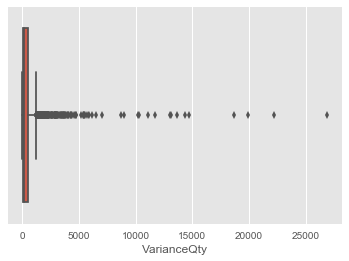

In [36]:
sns.boxplot(varQty_pos)

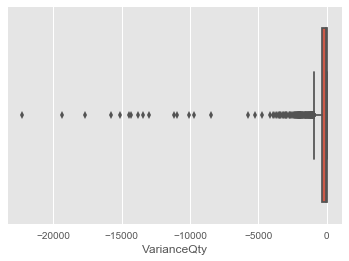

In [37]:
sns.boxplot(varQty_neg)

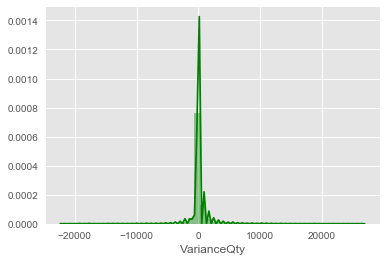

In [40]:
sns.distplot(varQty, color='green', norm_hist=True)

How many samples have perfect variance (VarianceQty = 0)?

In [25]:
df_IvAC_zeroes = df_IvAC[varQty == 0]
df_IvAC_zeroes.count()

InventoryID     179
ProductID       179
BeginQty        179
RecQty          179
EndQty          179
ActualQty       179
IdealQty        179
VarianceQty     179
PricePerQty     179
RecMeasureID    179
dtype: int64

## Part 2. Rollup MenuItems Dataset